In [1]:
import tensorflow as tf
import numpy as np

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

2025-05-09 12:49:03.184686: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-09 12:49:03.191592: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-09 12:49:03.260607: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-09 12:49:03.330481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746784143.425387  118761 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746784143.45

In [ ]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

X = tf.constant([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=tf.float32);

y = tf.constant([[0],
              [1],
              [1],
              [0]], dtype=tf.float32);



weights1 = tf.Variable(tf.random.normal([2, 2]))
weights2 = tf.Variable(tf.random.normal([1, 2]))

bias1 = tf.Variable(tf.zeros([2, 1]))
bias2 = tf.Variable(tf.zeros([1, 1]))

In [24]:
learning_rate = 0.1
epochs = 500

loss_history = []

activation_function = tf.tanh
#activation_function = sigmoid

for epoch in range(epochs):
    total_loss = 0.0
    for input_number in range(4):
        x0 = tf.reshape(X[input_number], [2, 1])
        target = tf.reshape(y[input_number], [1, 1])

        with tf.GradientTape() as tape:
            hidden_layer1 = tf.matmul(weights1, x0) + bias1
            hidden_output1 = activation_function(hidden_layer1)
            hidden_layer2 = tf.matmul(weights2, hidden_output1) + bias2
            hidden_output2 = activation_function(hidden_layer2)
            loss = tf.reduce_mean(tf.square(hidden_output2 - target))

        # Accumulate loss for this epoch
        total_loss += loss.numpy()

        # Compute gradients and update weights/biases
        gradients = tape.gradient(loss, [weights1, weights2, bias1, bias2])
        weights1.assign_sub(learning_rate * gradients[0])
        weights2.assign_sub(learning_rate * gradients[1])
        bias1.assign_sub(learning_rate * gradients[2])
        bias2.assign_sub(learning_rate * gradients[3])
    
  
    avg_loss = total_loss / 4
    loss_history.append(avg_loss)
    print(f'Epoch {epoch + 1}, Average Loss: {avg_loss}')


Epoch 1, Average Loss: 0.05362827121280134
Epoch 2, Average Loss: 0.052869875682517886
Epoch 3, Average Loss: 0.05211950954981148
Epoch 4, Average Loss: 0.05137741006910801
Epoch 5, Average Loss: 0.05064374185167253
Epoch 6, Average Loss: 0.04991854471154511
Epoch 7, Average Loss: 0.04920200281776488
Epoch 8, Average Loss: 0.048494147369638085
Epoch 9, Average Loss: 0.04779511597007513
Epoch 10, Average Loss: 0.047104945871979
Epoch 11, Average Loss: 0.04642370902001858
Epoch 12, Average Loss: 0.04575147689320147
Epoch 13, Average Loss: 0.04508826695382595
Epoch 14, Average Loss: 0.04443401447497308
Epoch 15, Average Loss: 0.043788890121504664
Epoch 16, Average Loss: 0.043152737664058805
Epoch 17, Average Loss: 0.04252565768547356
Epoch 18, Average Loss: 0.04190759011544287
Epoch 19, Average Loss: 0.04129848815500736
Epoch 20, Average Loss: 0.04069835809059441
Epoch 21, Average Loss: 0.040107078617438674
Epoch 22, Average Loss: 0.03952468233183026
Epoch 23, Average Loss: 0.038951061782

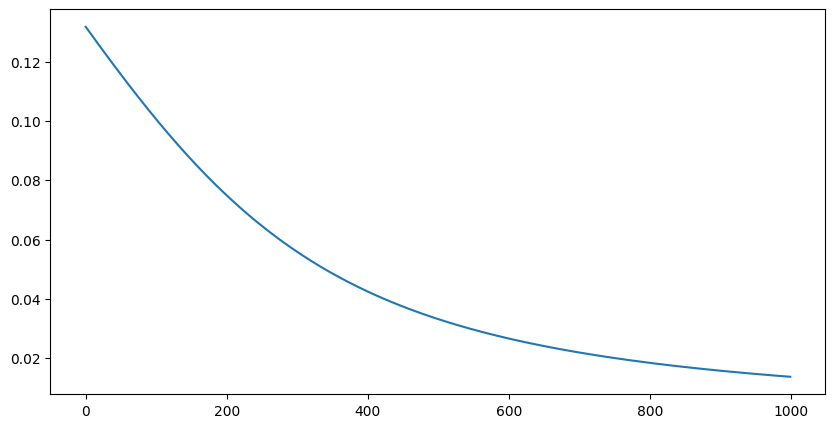

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.show()

In [25]:


# Testing the trained network
print("\nPredictions for each possible input:")
for input_number in range(4):
    x0 = tf.reshape(X[input_number], [2, 1])
    true_output = y[input_number].numpy().item()  # Extract scalar true output
    # Forward pass with trained weights
    hidden_layer1 = tf.matmul(weights1, x0) + bias1
    hidden_output1 = activation_function(hidden_layer1)
    hidden_layer2 = tf.matmul(weights2, hidden_output1) + bias2
    hidden_output2 = activation_function(hidden_layer2)
    output_value = hidden_output2.numpy().item()  # Extract scalar output
    prediction = 1 if output_value >= 0.5 else 0  # Classify output
    input_list = [int(x) for x in X[input_number].numpy()]  # Convert input to integers
    print(f"For input {input_list}, predicted: {prediction}, true: {int(true_output)}")


Predictions for each possible input:
For input [0, 0], predicted: 0, true: 0
For input [0, 1], predicted: 0, true: 0
For input [1, 0], predicted: 0, true: 0
For input [1, 1], predicted: 1, true: 1
